In [1]:
%matplotlib nbagg
%load_ext autoreload
%autoreload 2

In [2]:
import os
from pytarlody.load_data import load_wav_data
from pytarlody.time_frequency import generate_gabor, time_frequency_analysis
from pytarlody.maps_to_tab import mapping_to_tablature
from pytarlody.plot import plot_tf


In [3]:
def generate_tab(path: str, Bandwidth: float, Flo: float, 
                 Fhi: float, Nsteps: int, order: int):

    """
    Function to generate tablature of the guitar melody

    path
        Path of our data
    Bandwidth
        Bandiwidth for our analysis
    Flo
        Lowest frequency
    Fhi 
        Highest frequency
    Nsteps
        Sampling grid in the frequency
    order
        Distance range to find local minimum

    """

    # Load data
    Fs, data = load_wav_data(path)
    
    # Dimension of our data
    Nsamples = data.shape[0]

    # Generate gabor filter
    gabor_g, gabor_h, freq = generate_gabor(Bandwidth, Fs, Flo,
                                            Fhi, Nsteps)

    # Create time-frequency analysis
    tf = time_frequency_analysis(data, gabor_g, gabor_h, Nsamples, Nsteps)

    # Plot
    plot_tf(tf, Nsamples, Fs, freq)

    # Generate tablature
    
    tab = mapping_to_tablature(tf, order, Nsamples, freq)

    return tab

In [4]:
# Give path
filename = 'C-Doremi Descending1.wav'

<IPython.core.display.Javascript object>


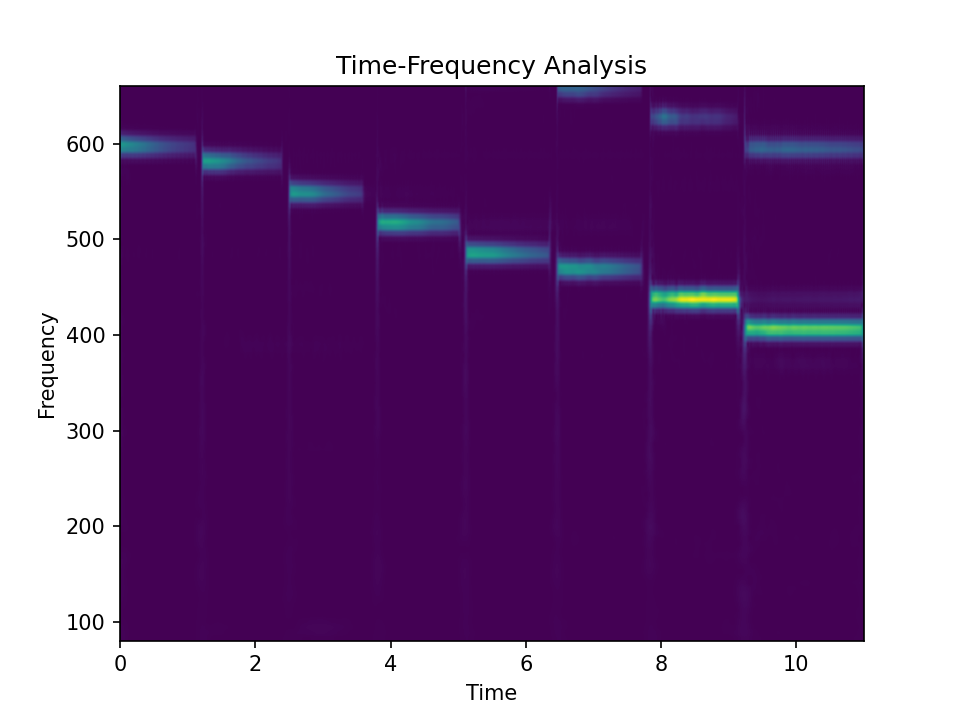

Str.1:8-7-7-7-5-3-1------
Str.2:--------------5-5-3
Str.3:-------------------
Str.4:-------------------
Str.5:-------------------
Str.6:-------------------



In [5]:
dir = '/home/bangun/Documents/pytarlody/data'
path = os.path.join(dir, filename)

# Parameters
Flo = 80
Fhi = 660
Nsteps = 100
Bandwidth = 1/12

order = 250
# Generate tab
tab = generate_tab(path, Bandwidth, Flo,
                   Fhi, Nsteps, order)
print(tab)